In [2]:
#package management 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon
import geopandas as gpd


In [3]:


#load shapefile for UK
uk_mainmap=gpd.read_file('/home/sozbothorbos/fishscrape2/shapefiles/GBR_adm/GBR_adm2.shp')

#load UK waterways and rescale
en_waterways=gpd.read_file('/home/sozbothorbos/fishscrape2/shapefiles/main_rivers_en/data/Statutory_Main_River_Map.shp')
crs={'init':'epsg:4326'}
en_waterways = en_waterways.to_crs(crs=crs) 



In [4]:
#load the scraped point data
with open("test_logs.txt", "r") as file:
    data2 = eval(file.readline())
    

#create dataframe from found co-ords and convert to points
crs={'init':'epsg:4326'}
finds_df=pd.DataFrame(data2,columns = ['latitude' , 'longitude']) 
wronguns = finds_df[(finds_df['longitude'] > 0) | (finds_df['latitude'] > 58) | (finds_df['latitude'] < -50)  | (finds_df['longitude'] < -10)]
finds_df2=finds_df[~finds_df.isin(wronguns)]

geometry=[Point(xy) for xy in zip(finds_df2['longitude'],finds_df2['latitude'])]
geo_df=gpd.GeoDataFrame(finds_df,crs=crs,geometry=geometry)





(50.34277777777778, 53.252125)

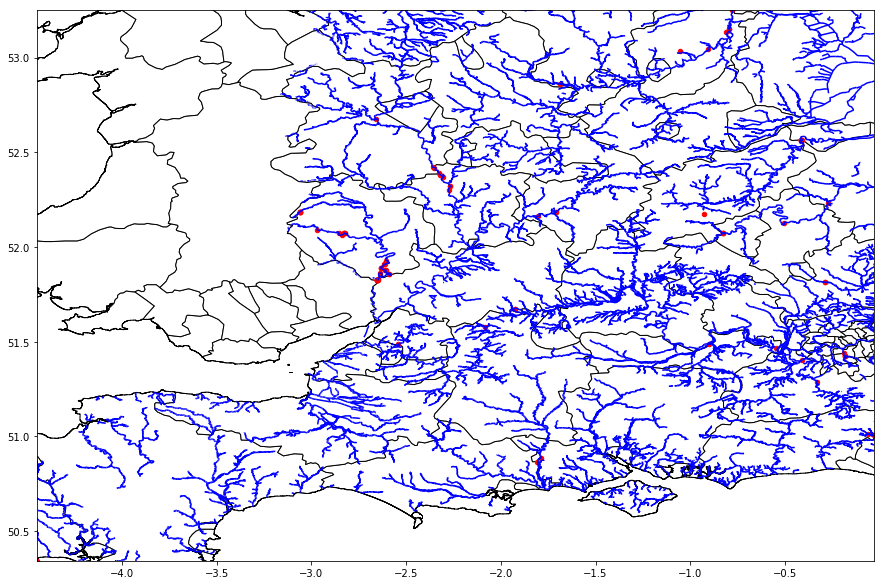

In [6]:
#plot the data on map

%matplotlib inline
uk_ROI = uk_mainmap.query(" ['Wales', 'England'] in NAME_1 ")
fig,ax=plt.subplots(figsize=(15,25))
en_waterways.plot(ax = ax,color='blue')
uk_ROI.plot(ax = ax,color="white", edgecolor='black')
geo_df.plot( ax = ax, markersize=20, color='red', marker = 'o')

minx=finds_df2['longitude'].min()
maxx=finds_df2['longitude'].max()
miny=finds_df2['latitude'].min()
maxy=finds_df2['latitude'].max()
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
